# Troubleshooting Guide

## Frequently Asked Questions (FAQ)

### **Question 1: What should I do if I amm running out of space when running Podman?**

#### Configuring Disk Space 

The containers images are stored in the `/var/lib/containers` directory when Podman is run by the root user. For standard users, images are typically stored in `$HOME/. local/share/containers/storage/`.

Since we would be running the experiment in the system as a standard user for security purposes, we would need to increase the storage of the home directory of the standard user for the setup.

We could use the command `df -h`  to view the current storage allocation. When we launch our machines by a cloud provider, the home directory tends to have 1GB of space. It is recommended to increase it by at least 35 GB.
<!-- 
An example of executing the above command would result in:

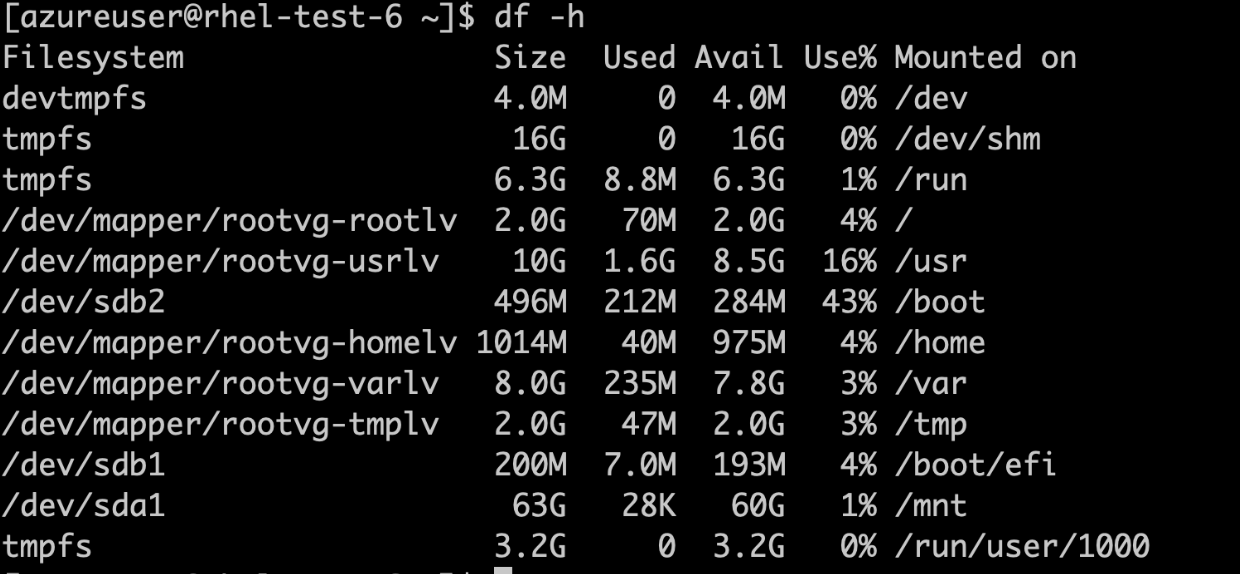 -->

Since RHEL uses `Logical Volume Mounts(LVM)`, you could check the remaining space by the command `sudo vgs`, to ensure that is has sufficilsent free space to add it to the home directory. Otherwise, there is a **separate process (link?)** in which we could increase the volume mounts by attaching another data disk.
<!-- 
An example of executing the above command would result in:

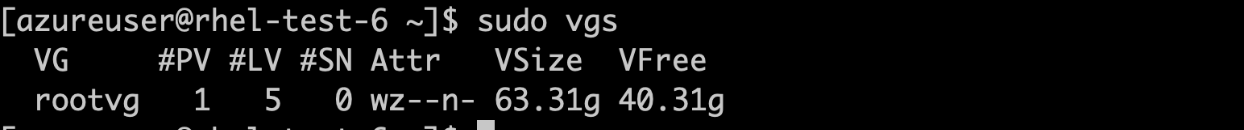 -->

We could observe that for this volume group `rootvg`, we have 40 GB of free disk space. This is sufficient as we plan to increase the home directory by only 35 GB.

**1.1.1 Increasing the size of home directory by logical mount**

To increase the home directory , the command would be:

```bash
sudo lvresize -L +<size_to_increase> <filesystem-directory-name>
```
    
For our example of increasing by 35 GB, the command would be like:

```bash
sudo lvresize -L +35G /dev/mapper/rootvg-homelv
```
<!--     
The output would be like:

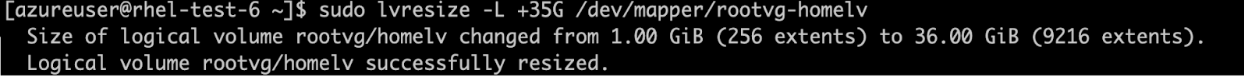 -->

**1.1.2 Expanding the directory to the new space**

To make use of the newly available space, we need to execute:
**[is there a command that's missing?]**


Since our home directory is of filesystem type `xfs` (could be verified by `df -h`), we will use the below command. Note that for other file systems it may differ.

```bash
sudo xfs_growfs /home
```

To verify that the space has been increased, we will run the `df -h` command again to verify the new available disk space.

<!-- 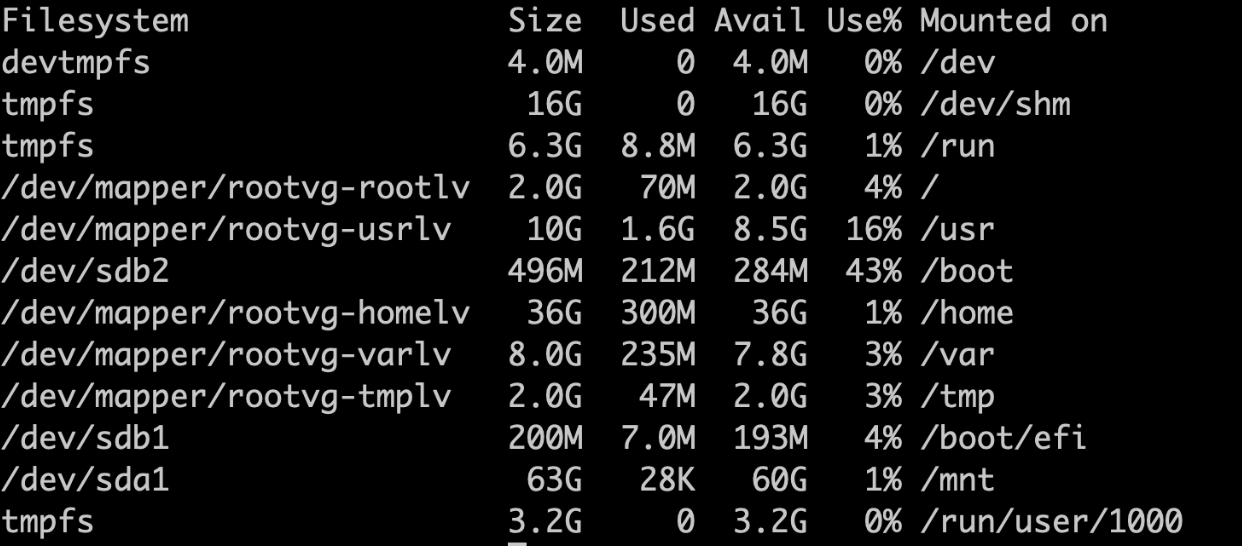 -->

**1.1.3: Increase space of /var directory**

Podman tends to use the `/var` as a `tmp` directory for caching images. Therefore, we will also need to expand the /`var` directory by using the below commands. It is recommended to have at least 30 GB of `/var` directory space for this step.

```bash
sudo lvresize -L +20G /dev/mapper/rootvg-varlv
```

```bash
sudo xfs_growfs /var
```

If the logical mount has less free space, kindly attach a new data disk and create a new partition to increase the logical mount space.

For more details, please refer to the documentation for [Increasing Logical volume space](https://access.redhat.com/documentation/en-us/red_hat_enterprise_linux/8/html/configuring_and_managing_logical_volumes/modifying-the-size-of-a-logical-volume_configuring-and-managing-logical-volumes).


### **Question 2. How do I make sure that I am running an application in Port 80?**

**Opening HTTP Port (80)**

If a standard user is launching their application on port 8080, then as an Admininistrator, we will need to follow the below steps to verify the port:

```bash
sudo firewall-cmd --add-service=http --permanent
```

Port forward http port to application port (ex: 8080)

```bash
sudo firewall-cmd --add-forward-port=port=80:proto=tcp:toport=8080 --permanent
```

Refresh Firewall settings

```bash
sudo firewall-cmd --reload
```

List the current firewall settings to verify

```bash
sudo `firewall-cmd --list-all
```   